<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis María Ramírez de la Rosa y Rodolfo Slay Ramos

**Fecha:** 25 de septiembre del 2020.

**Expediente** : 691761 y 715214.
**Profesor:** Oscar David Jaramillo Zuluaga.

#### Proyecto Modulo 2

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://cdn.aarp.net/content/dam/aarp/money/taxes/2020/06/1140-clock-irs-check-money.imgcache.rev0faeea298e4ef6d8fa7c39e18d5cf199.web.400.228.jpg" width="300" height="500" /> 

# <font color='green'> Ofuscando el Negocio
    
El proyecto consiste en poder hacer un predictivo de la Utilidad Operativa que va a tener una empresa que se dedica al crédito de nómina durante intervalos mensuales. Esto permitirá tomar mejores decisiones y poder tomar mejores decisiones en diversas áreas de la empresa. Ofuscando el Negocio, debido a que Ofuscar es el entendimiento y la capacidad de razonar o de darse cuenta con laridad de las cosas. Y esto es precisamente lo que queremos decifrar del Negocio que opera esta empresa; ¿cuál es la Uitlidad Operativa que se tiene en esta empresa de crédito por nómina y su distribución posible?

## Objetivos

Se suele decir que el unico riesgo que conllevan estas empresas es la renuncia o el despido de un empleado. Lo que se propone realizar en este proyecto es un predictivo de la Utilidad Operativa de una manera Mensual.

Como objetivos especificos:
- Se busca una manera para sacar los intereses reales que se cobran, ya que algunas tasas son globales y otras son sobre saldos insolutos y no se tiene una distincion.
- Se necesita determinar el plazo al que se toman los creditos para saber la velocidad con la cual se recupera el capital y poder ajustar las tasas pactadas a una manera mensual.
- Se busca determinar para cualquier dado el valor esperado a recolectar considerando que se distribuya el Saldo Vencido a traves de todo credito.


## Definicion del Problema, Nodos y Variables

El escenario de negocio que se quiere simular es para un mes dado cual es la distribución de utilidad que se espera tener. 
Los supuestos que se están asumiendo son: 
 -	Que el número actual de créditos sea constante
 -	Que todos los créditos tendrán que realizar un pago el mes entrante

Los nodos para simular son:
 * El capital que se presta 
 * Los intereses que se cobran 
 * El plazo al que se presta 
 * El Saldo vencido que se tiene en un crédito

La razón por la que se eligieron estos nodos es porque a pesar de que se tiene una variable llamada tasa, no es ideal utilizarla, ya que no se tiene una diferenciación entre Globales y Saldos Insolutos. Esto puede hacer que se merme mucho la respuesta sin importar cual sea la que se considere. Por lo que se denominará la tasa de ganancia mensual como:
FORMULA DE GANANCIA AQUÍ

Y para realizar el cálculo de las pérdidas esperadas se realizará de la siguiente manera:

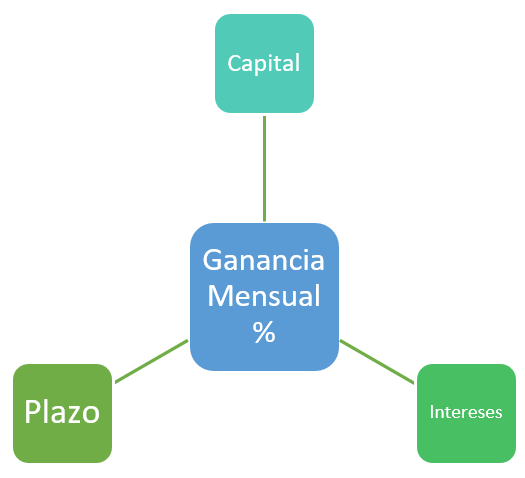
$$ Ganancia = \frac{interes}{capital * plazo} $$
Esto representa la Ganancia en un % mensual. 


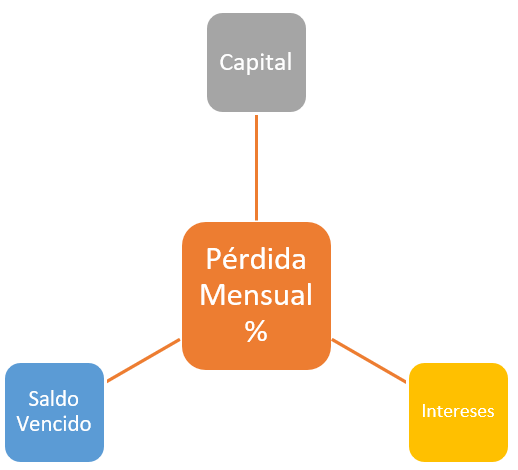
$$ Perdidas = \frac{SaldoVencido}{capital + interes} $$

Esto representa la pérdida esperada durante todo el crédito, por lo que tiene linealidad y no es necesario meter el plazo para mensualizar ya que es constanto durante todo el periodo.

Para poder tener en resumen una función de Utilidad que se vería más o menos así:

$$ UtilidadPorcentualMensual = Ganancia * (1 – Perdidas)$$

Y las ganancias y pérdidas mensuales estarían fluctuando conforme a las distintas variables que se tienen.


## Hipótesis y Supuestos

Se asumirá en las pérdidas que el Saldo Vencido incluye únicamente Capital e Interés ya que se tiene un mecanísmo que nete el IVA cobrado sobre Intereses. Otra consideración que se realizará es que como no se tienen las variables que determinan el score crediticio de una persona, entonces se hará una selección aleatoria del capital, los intereses y los plazos, debido a que en teoría toda combinatoria es posible por la cantidad de excepciones y tratos especiales que se tienen de manera interna en la empresa. Incluyendo en algunos casos tener Intereses o Saldos vencidos cercanos a cero en una gran cantidad de créditos.

A pesar de que se puede realizar el cálculo para diferenciar que tasas son Globales y que tasas son sobre Saldos Insolutos, se realizará como se expuso anteriormente debido a que por razones internas a veces se pone una tasa por formalidad a pesar de que la práctica no es la cobrada. Misma razón por la que no se utiliza esa variable ya que no es muy confiable. Pero los Intereses iniciales representan la cantidad total de intereses que se le estará cobrando a dicha persona.

## Obtención de Base de Datos

La razón por la que se tiene tanta información sobre la conformación y el comportamiento de la Base de Datos es porque es una base de datos real de la empresa donde trabaja uno de los integrantes del equipo. Por razones de confidencialidad se mantendrá anónima. La base de datos es la versión real de hace 1 año, sin embargo el acceso a una más actualizada para realizar dicho ejercicio no fue aprobada y se delimitó en gran medida los campos a los que se tuvo acceso. Se considera que para los fines de dicho proyecto es una Base de Datos ideal ya que tiene información y problemáticas que se tienen de una base de datos real. Además de tener el conocimiento de porque algunas variables teóricamente deberían ser las utilizadas, pero en la práctica resulta que mermaría de gran manera el resultado.

## Simulación y Resultados

In [1]:
import warnings
import datetime
import numpy as np
import pylab as plb
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('precision', 3)

In [3]:
data=pd.read_excel('DatosCreditos(1).xlsx')
data.head()

,Ingreso,Estatus,Capital_Inicial,Interes_inicial,IVA_Interes_Inicial,MONTO TOTAL,Saldo Vencido,Pagos,Plazo,TasaAnual
0,16158.78,Vigente,24000.0,3599.19,575.88,28175.07,0.000,10961.25,18,0.18
1,7770.00,Liquidado,20000.0,6241.08,998.55,27239.63,0.000,27249.23,18,0.36
2,18060.00,Vigente,20000.0,4800.00,768.00,25568.00,17582.344,7985.65,6,0.48
3,16000.00,Liquidado,22000.0,2789.93,446.40,25236.33,0.000,25229.76,6,0.42
4,14460.00,Vigente,17377.2,6454.69,1032.77,24864.66,0.000,8276.33,18,0.42


### Análisis y Distribución de las variables: "Capital_Inicial", "Interes_Inicial", "Plazo" y "Saldo Vencido"

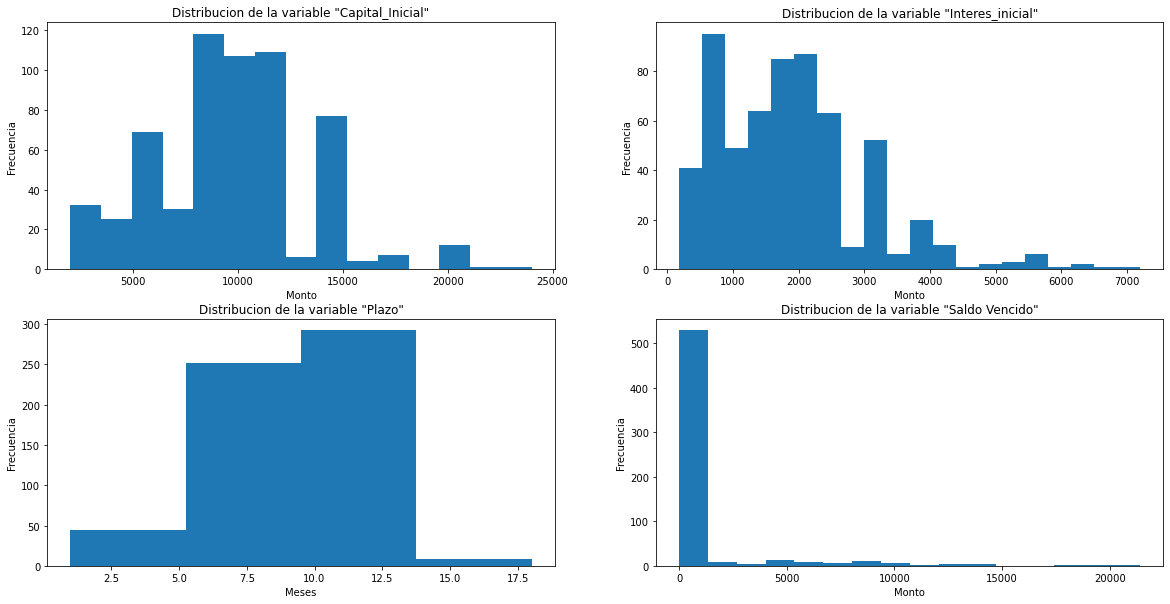

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(data['Capital_Inicial'], 15)
plt.title('Distribucion de la variable "Capital_Inicial"')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.subplot(2,2,2)
plt.hist(data['Interes_inicial'], 20)
plt.title('Distribucion de la variable "Interes_inicial"')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.subplot(2,2,3)
plt.hist(data['Plazo'], 4)
plt.title('Distribucion de la variable "Plazo"')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.subplot(2,2,4)
plt.hist(data['Saldo Vencido'], 16)
plt.title('Distribucion de la variable "Saldo Vencido"')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

### Validadción de Distribuciones para cada Variable

In [5]:
# Para la variable: Capital_Inicial
var_name_1 = 'Capital_Inicial' 
print('Parametros de la Distribución:')
a_1=st.beta.fit(data[var_name_1])[0]
b_1=st.beta.fit(data[var_name_1])[1]
loc_1=st.beta.fit(data[var_name_1])[2]
scale_1=st.beta.fit(data[var_name_1])[3]
print(st.beta.fit(data[var_name_1]))

Parametros de la Distribución:
(2.7187737961606375, 5.733583703486564, 1214.7802780378188, 26270.450450892276)


In [6]:
# Para la variable: Interes_inicial
var_name_2 = 'Interes_inicial' 
print('Parametros de la Distribución:')
a_2=st.beta.fit(data[var_name_2])[0]
b_2=st.beta.fit(data[var_name_2])[1]
loc_2=st.beta.fit(data[var_name_2])[2]
scale_2=st.beta.fit(data[var_name_2])[3]
print(st.beta.fit(data[var_name_2]))

Parametros de la Distribución:
(2.2464881598195876, 3443472080.341534, 92.04359061040697, 2735636112678.1084)


In [7]:
# Para la variable: Plazo 
var_name_3 = 'Plazo' 
print('Parametros de la Distribución:')
a_3=st.beta.fit(data[var_name_3])[0]
b_3=st.beta.fit(data[var_name_3])[1]
loc_3=st.beta.fit(data[var_name_3])[2]
scale_3=st.beta.fit(data[var_name_3])[3]
print(st.beta.fit(data[var_name_3]))

Parametros de la Distribución:
(3.1456487187187383, 4.069048341236344, 0.30149520558995974, 19.769900942080717)


In [8]:
# Para la variable: Saldo Vencido
var_name_4 = 'Saldo Vencido' 
print('Parametros de la Distribución:')
a_4=st.beta.fit(data[var_name_4])[0]
b_4=st.beta.fit(data[var_name_4])[1]
loc_4=st.beta.fit(data[var_name_4])[2]
scale_4=st.beta.fit(data[var_name_4])[3]
print(st.beta.fit(data[var_name_4]))

Parametros de la Distribución:
(0.16063517847770736, 426.6914997238744, -2.5122152342711446e-27, 243374.72406466064)


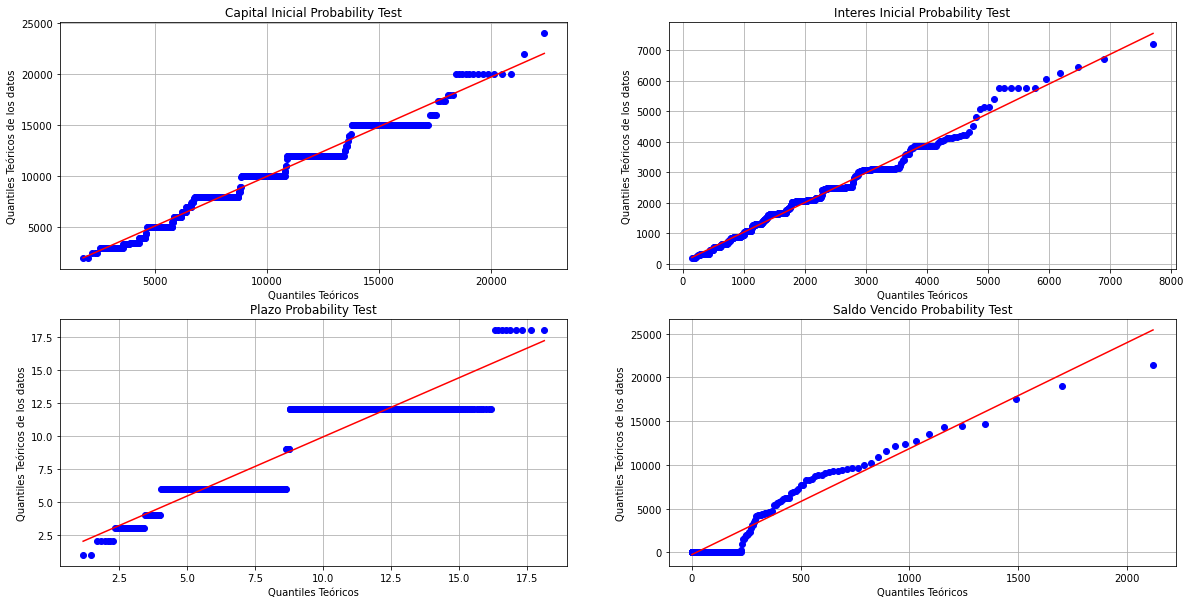

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
res = st.probplot(data[var_name_1],dist=st.beta,sparams=(a_1,b_1,loc_1,scale_1), plot=plt)
plt.grid()
plt.title("Capital Inicial Probability Test")
plt.xlabel('Quantiles Teóricos')
plt.ylabel('Quantiles Teóricos de los datos')
plt.subplot(2,2,2)
res = st.probplot(data[var_name_2],dist=st.beta,sparams=(a_2,b_2,loc_2,scale_2), plot=plt)
plt.grid()
plt.title("Interes Inicial Probability Test")
plt.xlabel('Quantiles Teóricos')
plt.ylabel('Quantiles Teóricos de los datos')
plt.subplot(2,2,3)
res = st.probplot(data[var_name_3],dist=st.beta,sparams=(a_3,b_3,loc_3,scale_3), plot=plt)
plt.grid()
plt.title("Plazo Probability Test")
plt.xlabel('Quantiles Teóricos')
plt.ylabel('Quantiles Teóricos de los datos')
plt.subplot(2,2,4)
res = st.probplot(data[var_name_4],dist=st.beta,sparams=(a_4,b_4,loc_4,scale_4), plot=plt)
plt.grid()
plt.title("Saldo Vencido Probability Test")
plt.xlabel('Quantiles Teóricos')
plt.ylabel('Quantiles Teóricos de los datos')
plt.show()

### Generación de Variables Aleatorias con las Distribuciones Anteriores

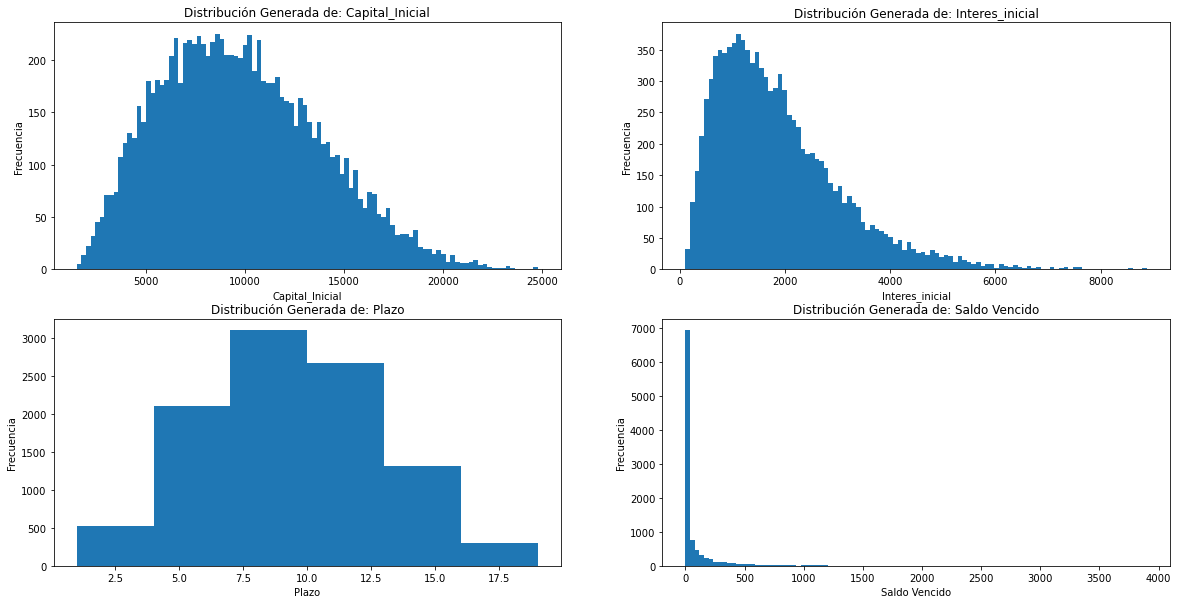

In [10]:
N = 10000
r_1 = st.beta.rvs(a=a_1,b = b_1,loc = loc_1, scale=scale_1, size=N)
r_2 = st.beta.rvs(a=a_2,b = b_2,loc = loc_2, scale=scale_2, size=N)
r_3 = np.round(st.beta.rvs(a=a_3,b = b_3,loc = loc_3, scale=scale_3, size=N))
r_4 = st.beta.rvs(a=a_4,b = b_4,loc = loc_4, scale=scale_4, size=N)
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(r_1,100)
plt.title('Distribución Generada de: ' + var_name_1)
plt.xlabel(var_name_1)
plt.ylabel('Frecuencia')
plt.subplot(2,2,2)
plt.hist(r_2,100)
plt.title('Distribución Generada de: ' + var_name_2)
plt.xlabel(var_name_2)
plt.ylabel('Frecuencia')
plt.subplot(2,2,3)
plt.hist(r_3,6)
plt.title('Distribución Generada de: ' + var_name_3)
plt.xlabel(var_name_3)
plt.ylabel('Frecuencia')
plt.subplot(2,2,4)
plt.hist(r_4,100)
plt.title('Distribución Generada de: ' + var_name_4)
plt.xlabel(var_name_4)
plt.ylabel('Frecuencia')
plt.show()

### Utilidad y Pérdida Esperada Usando Montecarlo

In [14]:
# Ordenar aleatoriamente los datos de las distribuciones creadas.
np.random.shuffle(r_1)
np.random.shuffle(r_2)
np.random.shuffle(r_3)
np.random.shuffle(r_4)
# Para optimizar el calculo de la ultilidad se hará de forma vectorizada

GananciaM = r_2 / (r_1 * r_3) 
Perdida = r_4 / (r_1 + r_2)

In [16]:
columns = [var_name_1, var_name_2, var_name_3, var_name_4, 'Ganancia', 'Perdida']
res = np.array([r_1, r_2, r_3, r_4, GananciaM, Perdida]).transpose()
df_results = pd.DataFrame(data=res, columns=columns)
df_results.head()

,Capital_Inicial,Interes_inicial,Plazo,Saldo Vencido,Ganancia,Perdida
0,14247.205,1302.114,12.0,2.784e+02,0.008,1.791e-02
1,14102.296,2163.215,7.0,1.004e+03,0.022,6.175e-02
2,16098.108,849.480,13.0,4.186e+00,0.004,2.470e-04
3,5863.571,1786.581,10.0,1.639e+01,0.030,2.143e-03
4,11878.611,1510.333,6.0,6.804e-05,0.021,5.082e-09


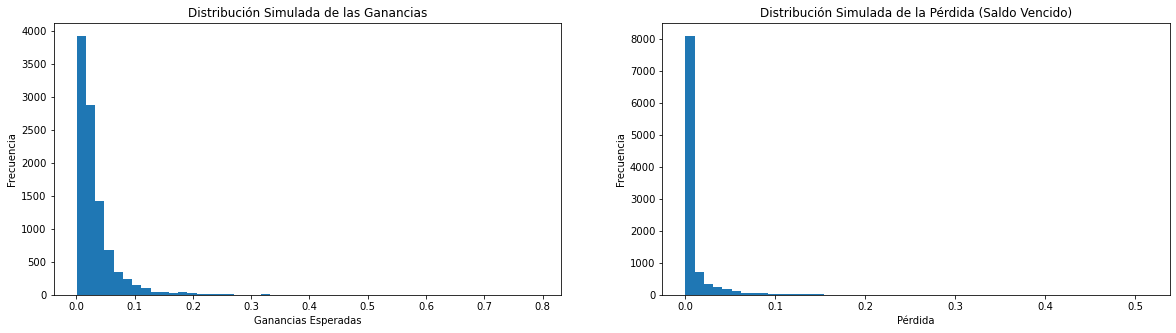

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(df_results['Ganancia'], bins=50)
plt.title('Distribución Simulada de las Ganancias')
plt.xlabel('Ganancias Esperadas')
plt.ylabel('Frecuencia')
plt.subplot(1,2,2)
plt.hist(df_results['Perdida'], bins=50)
plt.title('Distribución Simulada de la Pérdida (Saldo Vencido)')
plt.xlabel('Pérdida')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
print('Utilidad Esperada por Crédito en Porcentaje')
print((np.average(df_results['Ganancia'])-np.average(df_results['Perdida'])))
print('Utilidad Esperada por Crédito en Monto')
print(np.average(df_results['Capital_Inicial']) * (np.average(df_results['Ganancia'])-np.average(df_results['Perdida'])))

Utilidad Esperada por Crédito en Porcentaje
0.023821570828503766
Utilidad Esperada por Crédito en Monto
232.23536786534018


### Utilidad y Pérdida Esperada Usando Montecarlo en n meses

# Hasta aquí se tiene por el momento, pero falta hacer revisión de lo realizado más a detalle antes de entrega final.